In [62]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import pyplot as plt
pd.set_option("display.max_columns",50)


# What kind of player will be admitted into the hall of fame in baseball?

We can analyize the question from different perspectives. Such as:  
1. player's biographic data analysis.
2. player's baseball skill analysis
3. there always be another exception

# Player analysis

- ## Demographic Attribute

In [124]:
## read in player table and hall of fame table
player = pd.read_csv("core/Master.csv",parse_dates=["debut","finalGame"])
player["serviceYear"] = player["finalGame"] - player["debut"]
# player["serviceYear"] = player.serviceYear.astype('timedelta64[D]')
hall_of_fame = pd.read_csv("core/HallOfFame.csv")
hall_of_fame = hall_of_fame[hall_of_fame.category == "Player"]

player = player.join(hall_of_fame[hall_of_fame.inducted == "Y"][["playerID","inducted"]].set_index("playerID"),\
                     on="playerID")
player.inducted.fillna("N",inplace=True)

## fame person

# fame_person_demo = player[player.playerID.isin(fame_person.playerID)]
# not_fame_person_demo = player[~player.playerID.isin(fame_person.playerID)]

print(player.info())
player.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19105 entries, 0 to 19104
Data columns (total 26 columns):
playerID        19105 non-null object
birthYear       18973 non-null float64
birthMonth      18803 non-null float64
birthDay        18656 non-null float64
birthCountry    19036 non-null object
birthState      18534 non-null object
birthCity       18925 non-null object
deathYear       9441 non-null float64
deathMonth      9440 non-null float64
deathDay        9439 non-null float64
deathCountry    9436 non-null object
deathState      9390 non-null object
deathCity       9431 non-null object
nameFirst       19068 non-null object
nameLast        19105 non-null object
nameGiven       19068 non-null object
weight          18251 non-null float64
height          18320 non-null float64
bats            17920 non-null object
throws          18126 non-null object
debut           18910 non-null datetime64[ns]
finalGame       18910 non-null datetime64[ns]
retroID         19049 non-null object

playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
0  aardsda01     1981.0        12.0      27.0          USA         CO   
1  aaronha01     1934.0         2.0       5.0          USA         AL   
2  aaronto01     1939.0         8.0       5.0          USA         AL   
3   aasedo01     1954.0         9.0       8.0          USA         CA   
4   abadan01     1972.0         8.0      25.0          USA         FL   

    birthCity  deathYear  deathMonth  deathDay deathCountry deathState  \
0      Denver        NaN         NaN       NaN          NaN        NaN   
1      Mobile        NaN         NaN       NaN          NaN        NaN   
2      Mobile     1984.0         8.0      16.0          USA         GA   
3      Orange        NaN         NaN       NaN          NaN        NaN   
4  Palm Beach        NaN         NaN       NaN          NaN        NaN   

  deathCity nameFirst nameLast       nameGiven  weight  height bats throws  \
0       NaN     David  Aardsma     David Allan   215.0    75.0    R      R   
1       NaN      Hank    Aaron     Henry Louis   180.0    72.0    R      R   
2   Atlanta    Tommie    Aaron      Tommie Lee   190.0    75.0    R      R   
3       NaN       Don     Aase  Donald William   190.0    75.0    R      R   
4       NaN      Andy     Abad   Fausto Andres   184.0    73.0    L      L   

       debut  finalGame   retroID    bbrefID  serviceYear inducted  
0 2004-04-06 2015-08-23  aardd001  aardsda01    4156 days        N  
1 1954-04-13 1976-10-03  aaroh101  aaronha01    8209 days        Y  
2 1962-04-10 1971-09-26  aarot101  aaronto01    3456 days        N  
3 1977-07-26 1990-10-03  aased001   aasedo01    4817 days        N  
4 2001-09-10 2006-04-13  abada001   abadan01    1676 days        N

First, let's take it easy. Have a look at the first name players' most used. We see *John*, *Bill*, *Mike*, *Jim*,etc.. Do you feel interesting? Perhaps in each job, there may be a popular name.

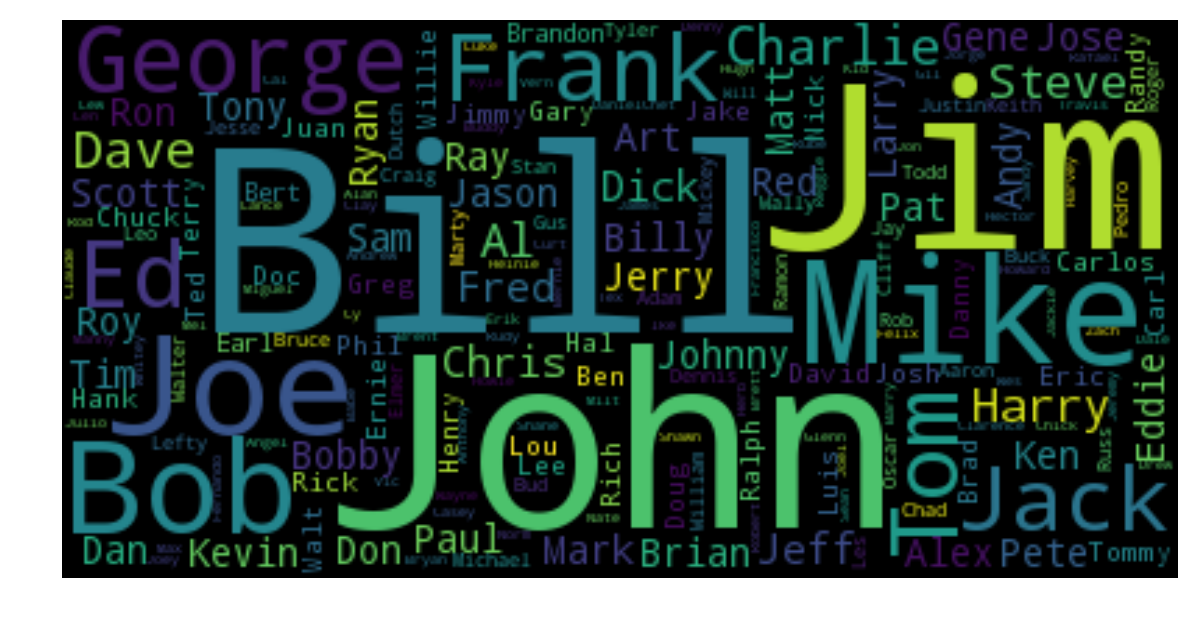

In [125]:
wordcloud=WordCloud().generate_from_frequencies(player.nameFirst.value_counts().to_dict())
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

We find something intersting. About **1010** people only appear once in league, there first appear is their last game. We also find a strange things, at **row 11509**, the player's service year is a minus. That's a little weird.  
Average people, the **mean** of the service year is about **4.5** year and the person's **longest service year** is **35**.

In [131]:
player.describe()

birthYear    birthMonth      birthDay    deathYear   deathMonth  \
count  18973.000000  18803.000000  18656.000000  9441.000000  9440.000000   
mean    1931.435356      6.629474     15.614816  1964.287364     6.483581   
std       41.555514      3.468103      8.750216    31.808030     3.529655   
min     1820.000000      1.000000      1.000000  1872.000000     1.000000   
25%     1895.000000      4.000000      8.000000  1942.000000     3.000000   
50%     1937.000000      7.000000     16.000000  1967.000000     6.000000   
75%     1969.000000     10.000000     23.000000  1990.000000    10.000000   
max     1996.000000     12.000000     31.000000  2017.000000    12.000000   

          deathDay        weight        height                serviceYear  
count  9439.000000  18251.000000  18320.000000                      18910  
mean     15.569552    186.375596     72.273799  1761 days 21:48:15.610787  
std       8.779552     21.524765      2.603904  1832 days 17:33:00.130745  
min       1.000000     65.000000     43.000000          -4 days +00:00:00  
25%       8.000000    170.000000     71.000000          138 days 00:00:00  
50%      15.000000    185.000000     72.000000         1163 days 00:00:00  
75%      23.000000    200.000000     74.000000         2931 days 00:00:00  
max      31.000000    320.000000     83.000000        12862 days 00:00:00

In [5]:
player[player["serviceYear"] < pd.Timedelta("1 days")].head()

playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
20   abercda01     1850.0         1.0       2.0          USA         OK   
22   abernbi01     1929.0         1.0      30.0          USA         CA   
76   adamsji01     1868.0         NaN       NaN          USA         IL   
77   adamsjo01     1877.0        10.0      28.0          USA         IL   
107  adkinhe01     1874.0         1.0      19.0          USA         MO   

          birthCity  deathYear  deathMonth  deathDay deathCountry deathState  \
20      Fort Towson     1939.0        11.0      11.0          USA         PA   
22         Torrance     2006.0         2.0      19.0          USA         CA   
76   East St. Louis        NaN         NaN       NaN          NaN        NaN   
77           Cowden     1952.0        10.0       8.0          USA         MO   
107          Fulton     1953.0         1.0       2.0          USA         MO   

        deathCity nameFirst     nameLast          nameGiven  weight  height  \
20   Philadelphia     Frank  Abercrombie  Francis Patterson     NaN     NaN   
22        Yucaipa      Bill   Abernathie     William Edward   190.0    70.0   
76            NaN       Jim        Adams           James J.   148.0    66.0   
77       Bachelor       Joe        Adams      Joseph Edward   190.0    72.0   
107        Mexico     Harry     Atkinson         John Harry     NaN     NaN   

    bats throws      debut  finalGame   retroID    bbrefID  serviceYear  \
20   NaN    NaN 1871-10-21 1871-10-21  aberd101  abercda01       0 days   
22     R      R 1952-09-27 1952-09-27  aberb101  abernbi01       0 days   
76   NaN      R 1890-04-21 1890-04-21  adamj101  adamsji01       0 days   
77     R      L 1902-04-26 1902-04-26  adamj102  adamsjo01       0 days   
107  NaN    NaN 1895-09-25 1895-09-25  adkih101  adkinhe01       0 days   

    inducted  
20         N  
22         N  
76         N  
77         N  
107        N

In [130]:
player[player["serviceYear"] < pd.Timedelta("0 days")]

playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
11509  menzete01     1897.0        11.0       4.0          USA         MO   

       birthCity  deathYear  deathMonth  deathDay deathCountry deathState  \
11509  St. Louis     1969.0        12.0      23.0          USA         MO   

       deathCity nameFirst nameLast         nameGiven  weight  height bats  \
11509  St. Louis       Ted    Menze  Theodore Charles   172.0    69.0    R   

      throws      debut  finalGame   retroID    bbrefID  serviceYear inducted  
11509      R 1918-04-27 1918-04-23  menzt101  menzete01      -4 days        N

In [129]:
player.loc[player["serviceYear"].argmax()]

playerID                  altroni01
birthYear                      1876
birthMonth                        9
birthDay                         15
birthCountry                    USA
birthState                       OH
birthCity                Cincinnati
deathYear                      1965
deathMonth                        1
deathDay                         20
deathCountry                    USA
deathState                       DC
deathCity                Washington
nameFirst                      Nick
nameLast                    Altrock
nameGiven                  Nicholas
weight                          197
height                           70
bats                              B
throws                            L
debut           1898-07-14 00:00:00
finalGame       1933-10-01 00:00:00
retroID                    altrn101
bbrefID                   altroni01
serviceYear     12862 days 00:00:00
inducted                          N
Name: 266, dtype: object

We see that, the one enter into the hall of fame the youngest only just appear in one game, maybe there's some amazing reason behind it. We found that **1** people become the baseball hero used **less than 1 year**. Most of the player have their pass need average **17 years** fight. 

In [137]:
player[player.inducted == "Y"].serviceYear.astype('timedelta64[Y]').describe()

count    224.000000
mean      17.330357
std        4.138604
min        0.000000
25%       15.000000
50%       17.500000
75%       20.000000
max       32.000000
Name: serviceYear, dtype: float64

In [136]:
player[player.inducted == "Y"][player[player.inducted == "Y"].serviceYear.astype('timedelta64[Y]')<1]

playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
2075  brownwi02     1915.0         6.0      26.0          USA         LA   

       birthCity  deathYear  deathMonth  deathDay deathCountry deathState  \
2075  Shreveport     1996.0         8.0       4.0          USA         TX   

     deathCity nameFirst nameLast       nameGiven  weight  height bats throws  \
2075   Houston   Willard    Brown  Willard Jessie   200.0    71.0    R      R   

          debut  finalGame   retroID    bbrefID  serviceYear inducted  
2075 1947-07-19 1947-08-17  broww101  brownwi02      29 days        Y

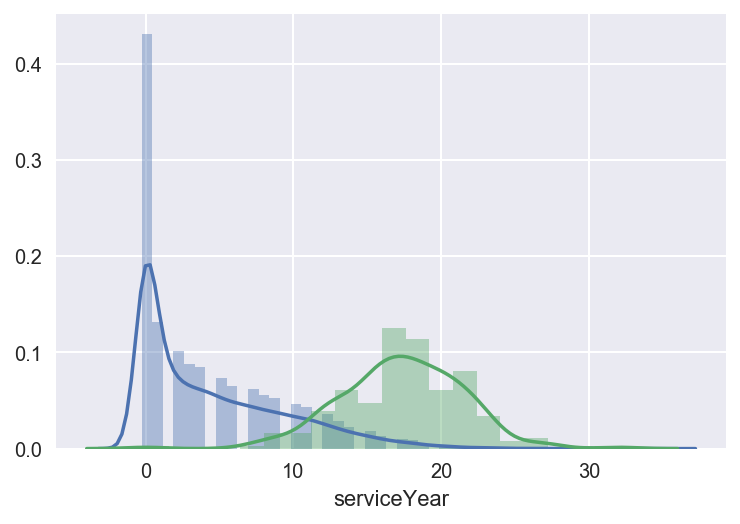

In [135]:
sns.distplot(player.serviceYear.astype('timedelta64[Y]').dropna())
sns.distplot(player[player.inducted == "Y"].serviceYear.astype('timedelta64[Y]').dropna())

From the fig, we can see that the **mean** of the height is about **70** inches and the **mean** of the weight is **186** pounds. They all follow pretty normal distribution.

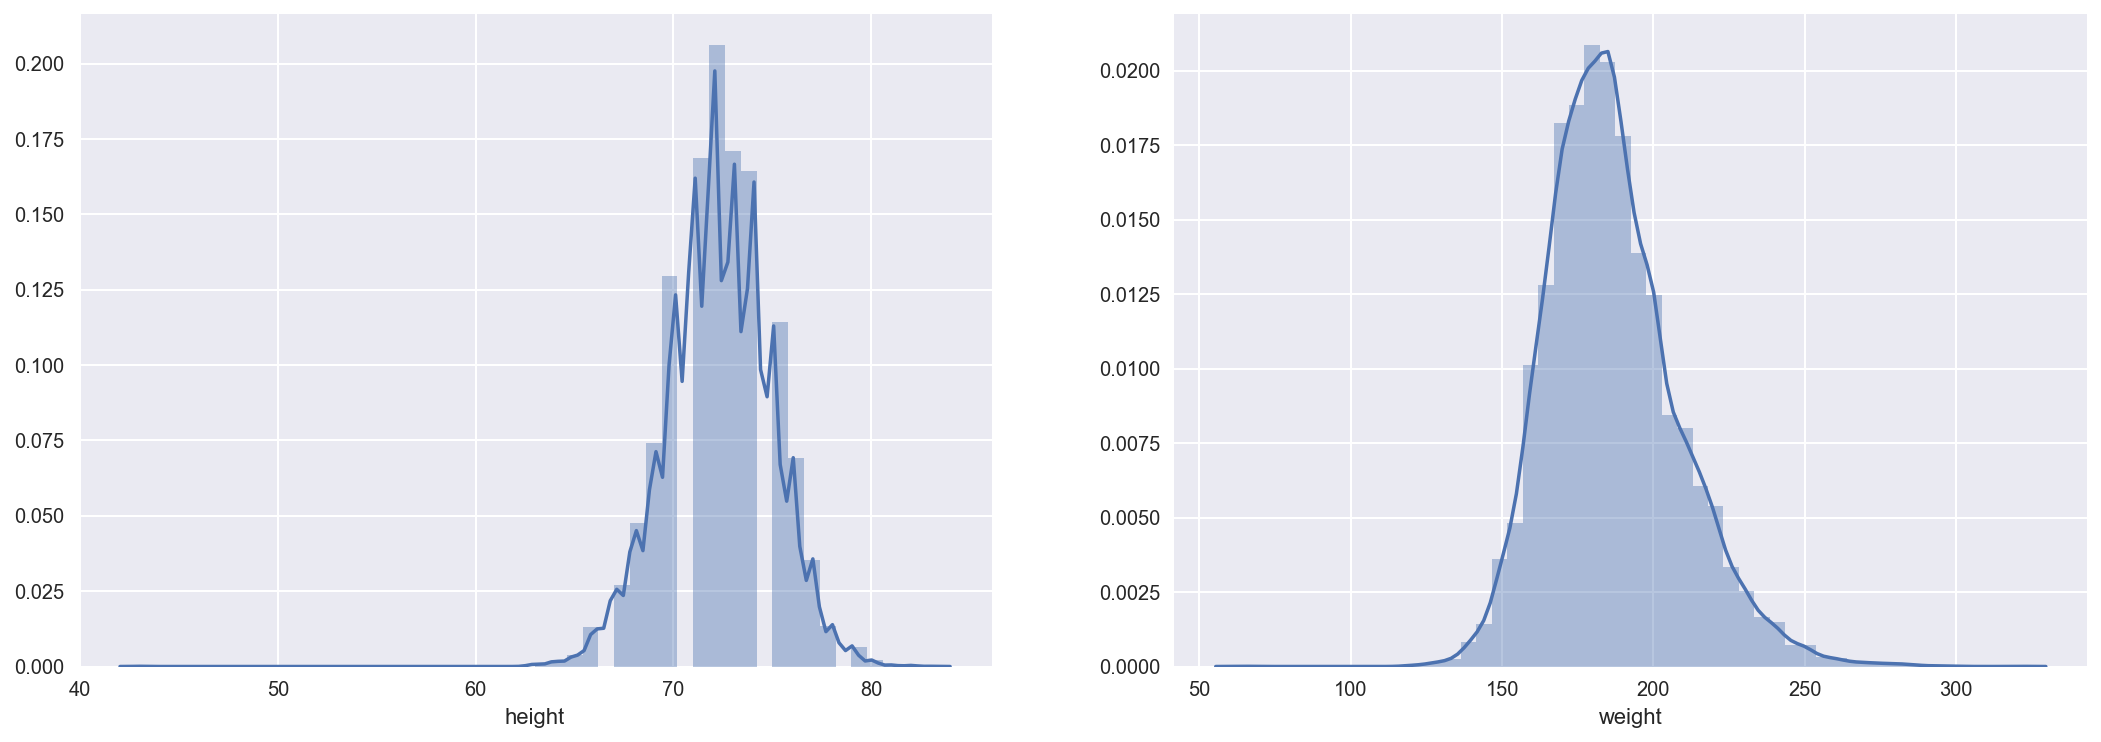

In [9]:
fig,axes_w_h = plt.subplots(1,2,figsize=(18,6))
sns.distplot(player["height"].dropna(),ax=axes_w_h[0])
sns.distplot(player["weight"].dropna(),ax=axes_w_h[1])

We can really see some pattern here. The ones chosen for the hall of fame. Their height and weight are in the center of the players. Maybe that's much more close to public aesthetics. Maybe they are not the best player. That need further validate.

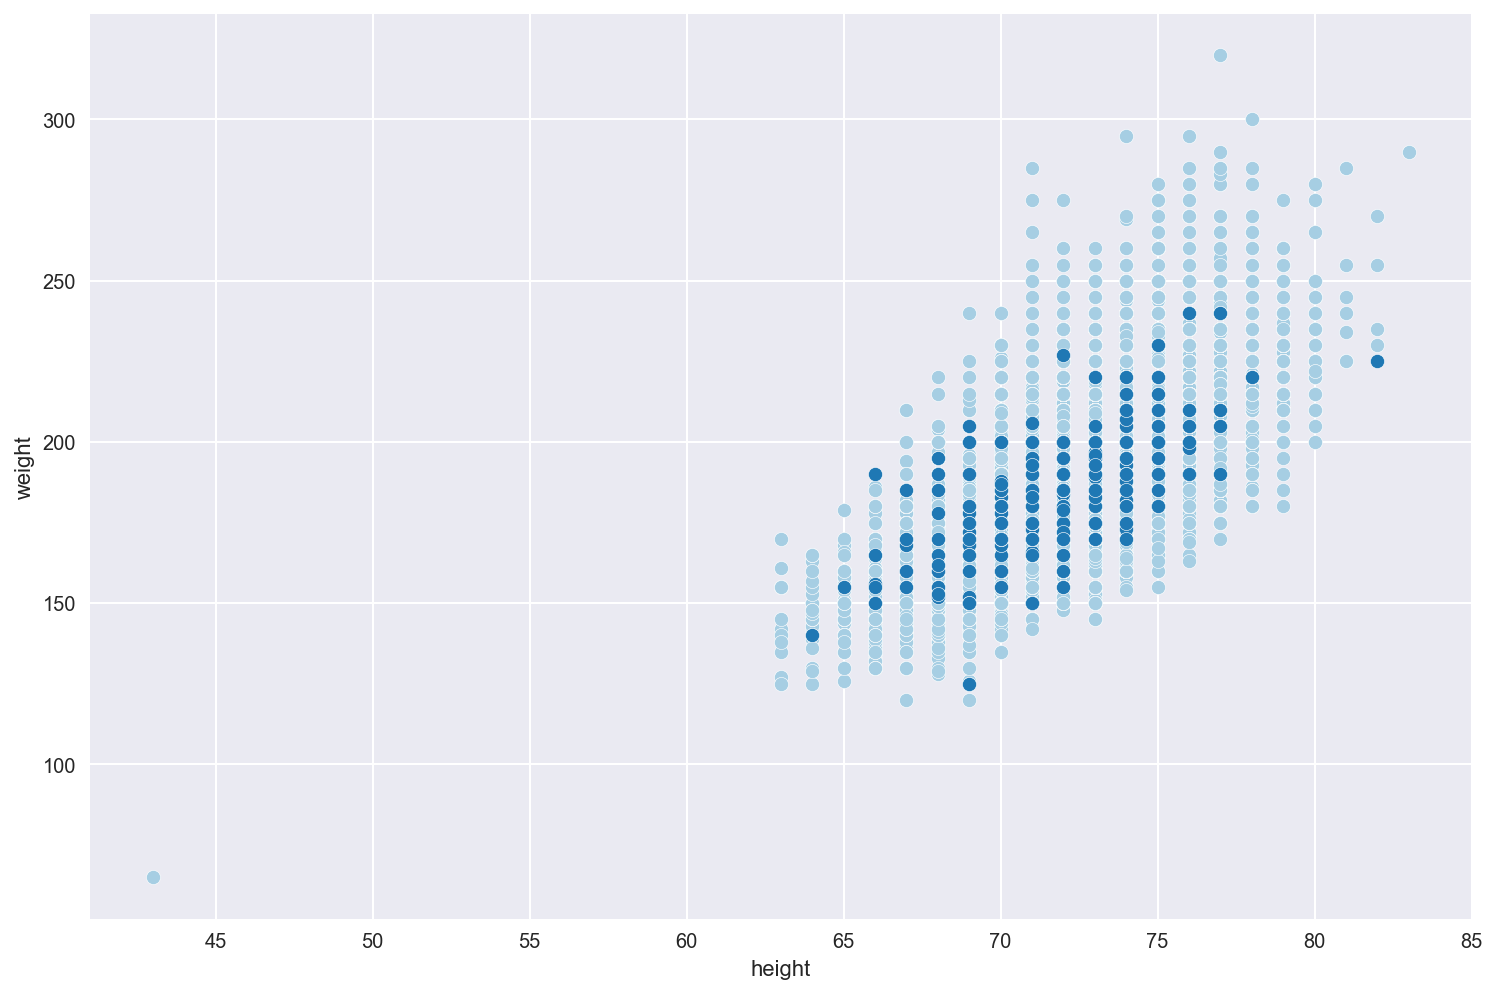

In [139]:
g = sns.FacetGrid(player, hue="inducted", size=7,aspect=1.5,palette=sns.color_palette(sns.color_palette("Paired")))
g.map(plt.scatter, "height", "weight", s=50, edgecolor="white")

- ## hall of fame 
From the data, we can see that the create of the hall of fame is from **1939** year.  

In [151]:
fame_person = hall_of_fame[hall_of_fame.category == "Player"][hall_of_fame.inducted == "Y"]
print(hall_of_fame.info())
hall_of_fame.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4031 entries, 0 to 4153
Data columns (total 9 columns):
playerID       4031 non-null object
yearid         4031 non-null int64
votedBy        4031 non-null object
ballots        3903 non-null float64
needed         3746 non-null float64
votes          3903 non-null float64
inducted       4031 non-null object
category       4031 non-null object
needed_note    157 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 314.9+ KB
None


playerID  yearid votedBy  ballots  needed  votes inducted category  \
0   cobbty01    1936   BBWAA    226.0   170.0  222.0        Y   Player   
1   ruthba01    1936   BBWAA    226.0   170.0  215.0        Y   Player   
2  wagneho01    1936   BBWAA    226.0   170.0  215.0        Y   Player   
3  mathech01    1936   BBWAA    226.0   170.0  205.0        Y   Player   
4  johnswa01    1936   BBWAA    226.0   170.0  189.0        Y   Player   

  needed_note  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

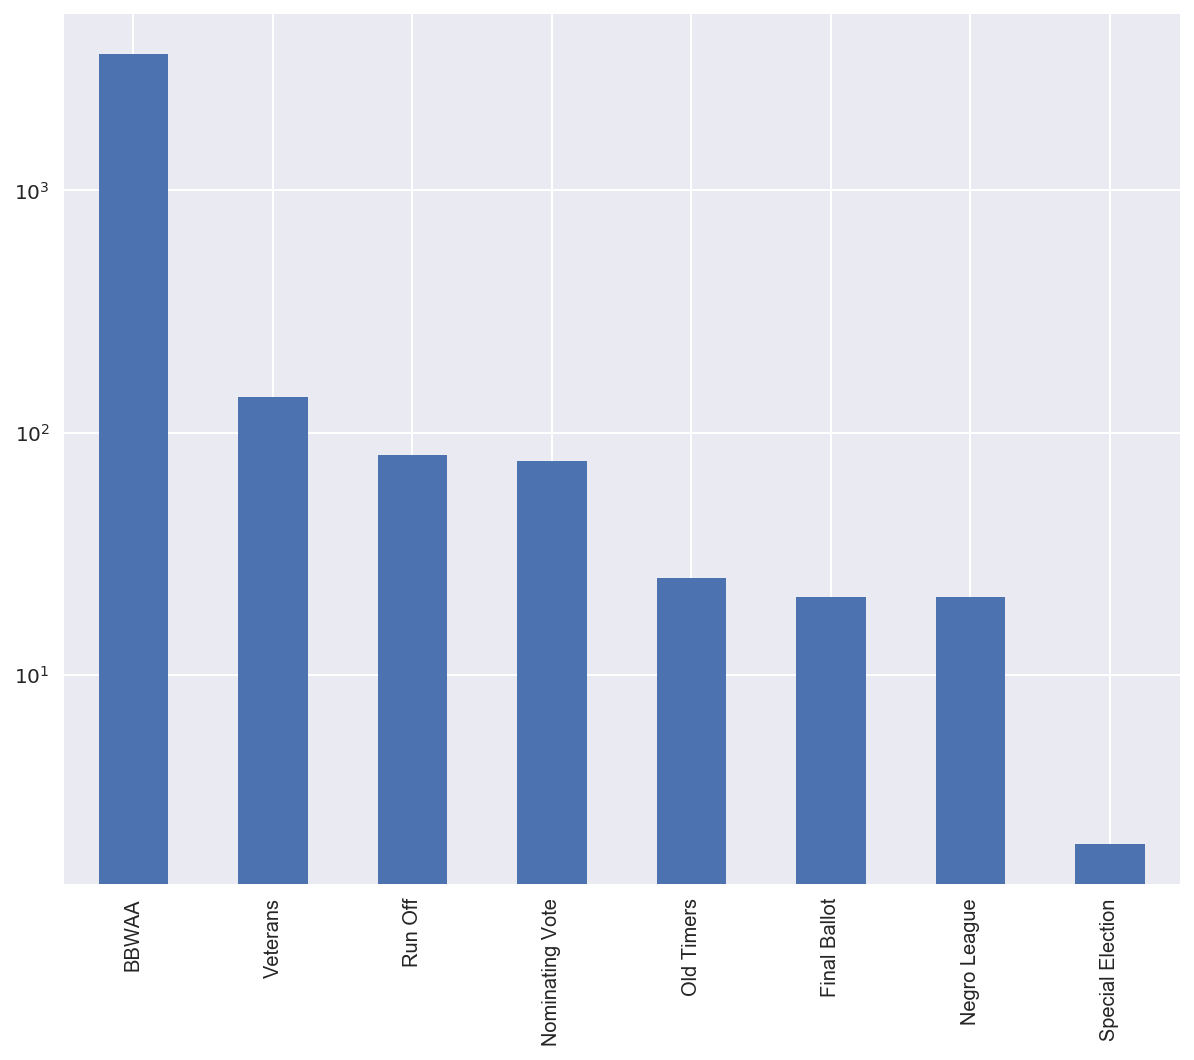

In [153]:
hall_of_fame.votedBy.value_counts().plot.bar(figsize=(10,8),logy=True)

Every year, the number of people chosen into the hall of fame is different. From the barchart, we can see that:  
1. Some year we don't choose the popular player because of some reason.
2. Some year we choose only a few people but some year we choose a lot.

In [118]:
fame_person.groupby("yearid").size().describe()

count    76.000000
mean      4.171053
std       2.749003
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max      18.000000
dtype: float64

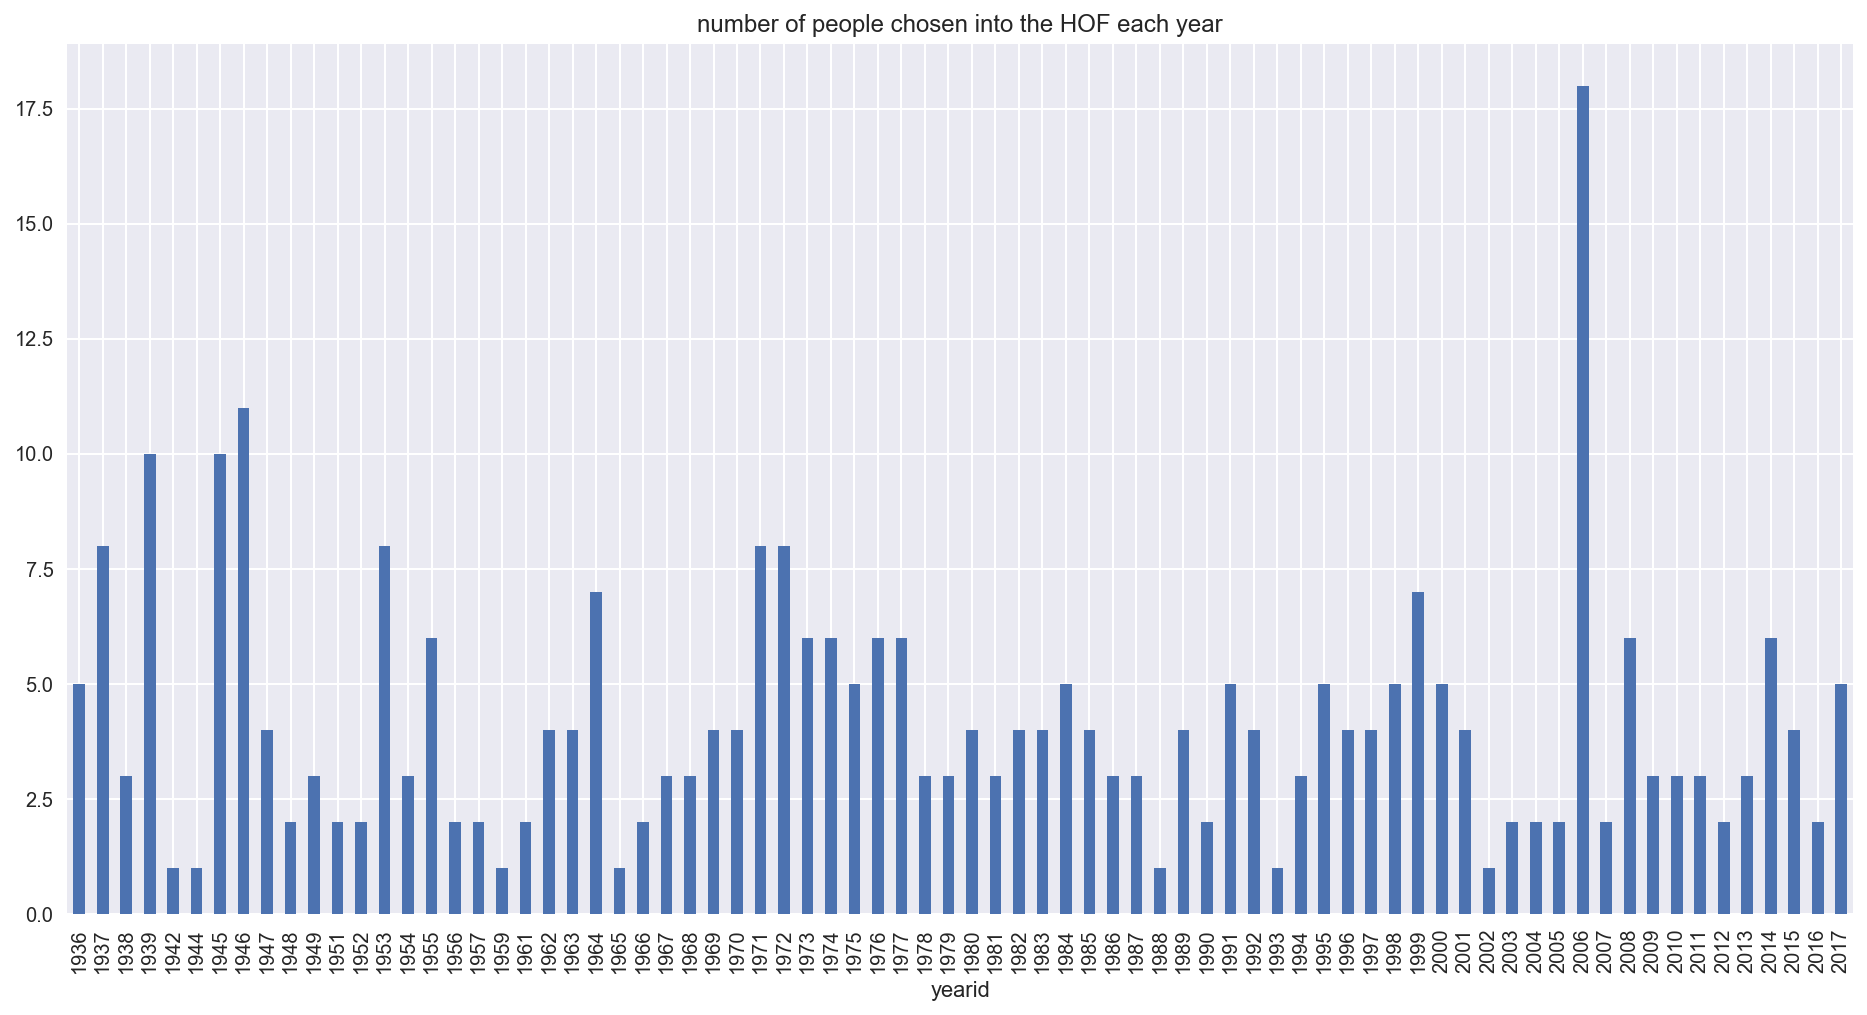

In [120]:
fame_person.groupby("yearid").size().plot.bar(figsize=(16,8),title="number of people chosen into the HOF each year")

Some people have many times take part in the elected to the hall of fame.
A person even tried **20 times** in the ballot, that means 20 years. Most people only have **1** chance.

In [148]:
hall_of_fame.groupby("playerID").size().describe()

count    1260.000000
mean        3.298413
std         4.194042
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max        20.000000
dtype: float64

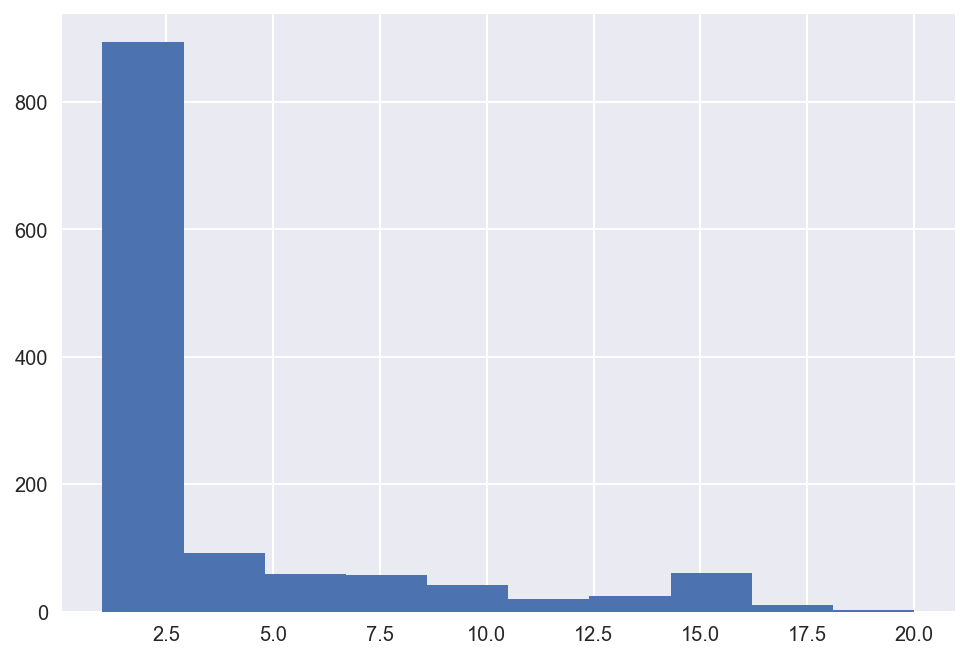

In [149]:
hall_of_fame.groupby("playerID").size().hist()

The votes needed to enter in the hall of fame is ever increasing. In another words, with the more people have interest in baseball, the player need more vote to enter into the hall of fame

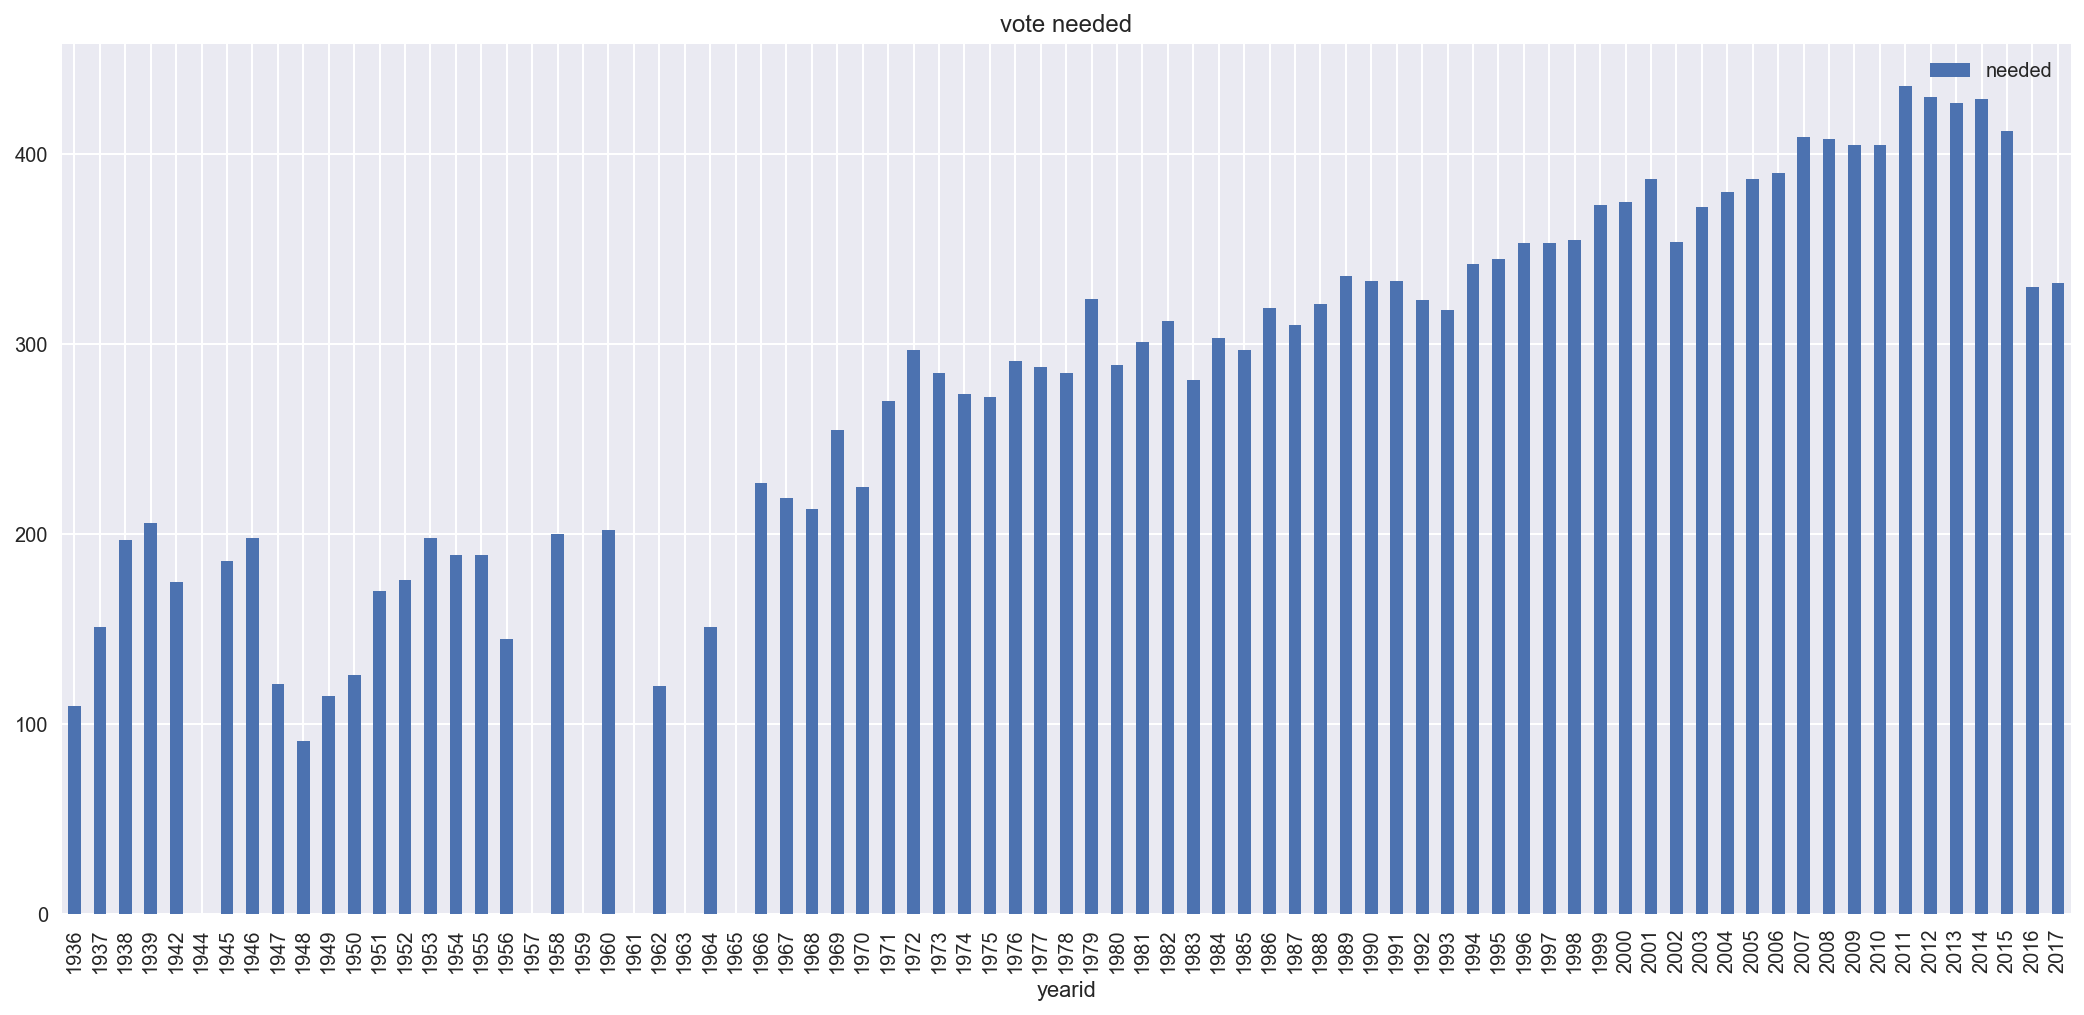

In [99]:
hall_of_fame[["yearid","needed"]].groupby("yearid").mean().fillna(0).plot.bar(figsize=(18,8),style = "o-",title="vote needed")

# Remain the work is undone, Thank you

# Batting 

In [3]:
batting = pd.read_csv("core/Batting.csv")
print(batting.info())
batting.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 22 columns):
playerID    102816 non-null object
yearID      102816 non-null int64
stint       102816 non-null int64
teamID      102816 non-null object
lgID        102079 non-null object
G           102816 non-null int64
AB          102816 non-null int64
R           102816 non-null int64
H           102816 non-null int64
2B          102816 non-null int64
3B          102816 non-null int64
HR          102816 non-null int64
RBI         102392 non-null float64
SB          101516 non-null float64
CS          79360 non-null float64
BB          102816 non-null int64
SO          94978 non-null float64
IBB         66251 non-null float64
HBP         100006 non-null float64
SH          96478 non-null float64
SF          66782 non-null float64
GIDP        76706 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 17.3+ MB
None


playerID  yearID  stint teamID lgID   G   AB   R   H  2B  3B  HR   RBI  \
0  abercda01    1871      1    TRO  NaN   1    4   0   0   0   0   0   0.0   
1   addybo01    1871      1    RC1  NaN  25  118  30  32   6   0   0  13.0   
2  allisar01    1871      1    CL1  NaN  29  137  28  40   4   5   0  19.0   
3  allisdo01    1871      1    WS3  NaN  27  133  28  44  10   2   2  27.0   
4  ansonca01    1871      1    RC1  NaN  25  120  29  39  11   3   0  16.0   

    SB   CS  BB   SO  IBB  HBP  SH  SF  GIDP  
0  0.0  0.0   0  0.0  NaN  NaN NaN NaN   NaN  
1  8.0  1.0   4  0.0  NaN  NaN NaN NaN   NaN  
2  3.0  1.0   2  5.0  NaN  NaN NaN NaN   NaN  
3  1.0  1.0   0  2.0  NaN  NaN NaN NaN   NaN  
4  6.0  2.0   2  1.0  NaN  NaN NaN NaN   NaN

In [93]:
post_batting_df = pd.read_csv("core/BattingPost.csv")
## enter divide poster batting 
enter_post_batting = batting[batting["playerID"].isin(post_batting["playerID"].unique())]
no_enter_post_batting = batting[~batting["playerID"].isin(post_batting["playerID"].unique())]
print(post_batting.info())
post_batting.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13543 entries, 0 to 13542
Data columns (total 22 columns):
yearID      13543 non-null int64
round       13543 non-null object
playerID    13543 non-null object
teamID      13543 non-null object
lgID        13543 non-null object
G           13543 non-null int64
AB          13543 non-null int64
R           13543 non-null int64
H           13543 non-null int64
2B          13543 non-null int64
3B          13543 non-null int64
HR          13543 non-null int64
RBI         13543 non-null int64
SB          13543 non-null int64
CS          13342 non-null float64
BB          13543 non-null int64
SO          13543 non-null int64
IBB         13543 non-null int64
HBP         13342 non-null float64
SH          13342 non-null float64
SF          13342 non-null float64
GIDP        13342 non-null float64
dtypes: float64(5), int64(13), object(4)
memory usage: 2.3+ MB
None


yearID round   playerID teamID lgID  G  AB  R  H  2B  3B  HR  RBI  SB  CS  \
0    1884    WS  becanbu01    NY4   AA  1   2  0  1   0   0   0    0   0 NaN   
1    1884    WS  bradyst01    NY4   AA  3  10  1  0   0   0   0    0   0 NaN   
2    1884    WS  carrocl01    PRO   NL  3  10  2  1   0   0   0    1   0 NaN   
3    1884    WS  dennyje01    PRO   NL  3   9  3  4   0   1   1    2   0 NaN   
4    1884    WS  esterdu01    NY4   AA  3  10  0  3   1   0   0    0   1 NaN   

   BB  SO  IBB  HBP  SH  SF  GIDP  
0   0   0    0  NaN NaN NaN   NaN  
1   0   1    0  NaN NaN NaN   NaN  
2   1   1    0  NaN NaN NaN   NaN  
3   0   3    0  NaN NaN NaN   NaN  
4   0   3    0  NaN NaN NaN   NaN

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11baf7a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11996d5f8>]], dtype=object)

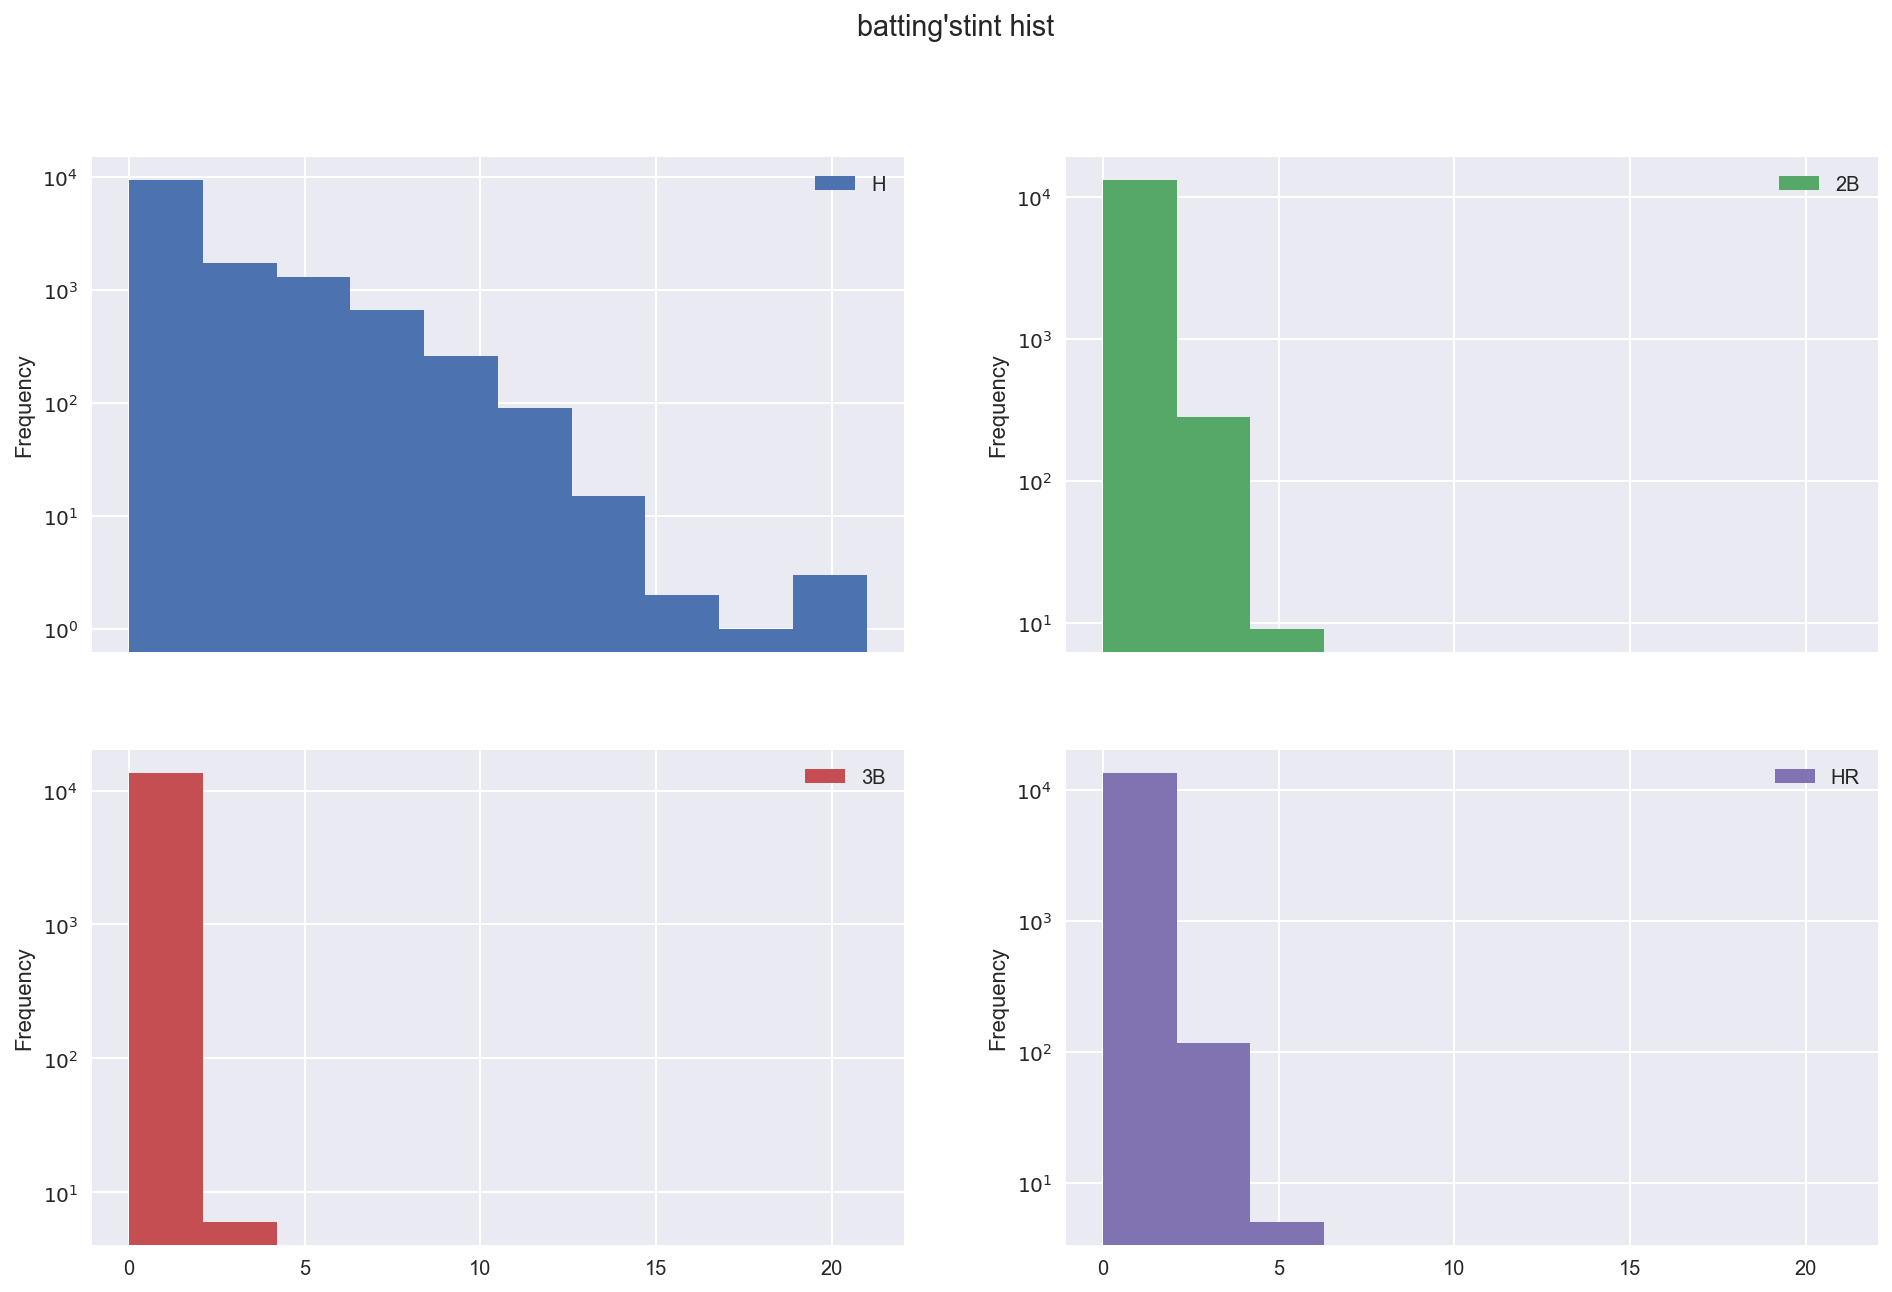

In [29]:
post_batting[["H","2B","3B","HR"]].plot.hist(subplots=True,bins=10,logy=True,title="batting'stint hist",figsize=(16,10),layout=(2,2))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118e97d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110c5ce80>]], dtype=object)

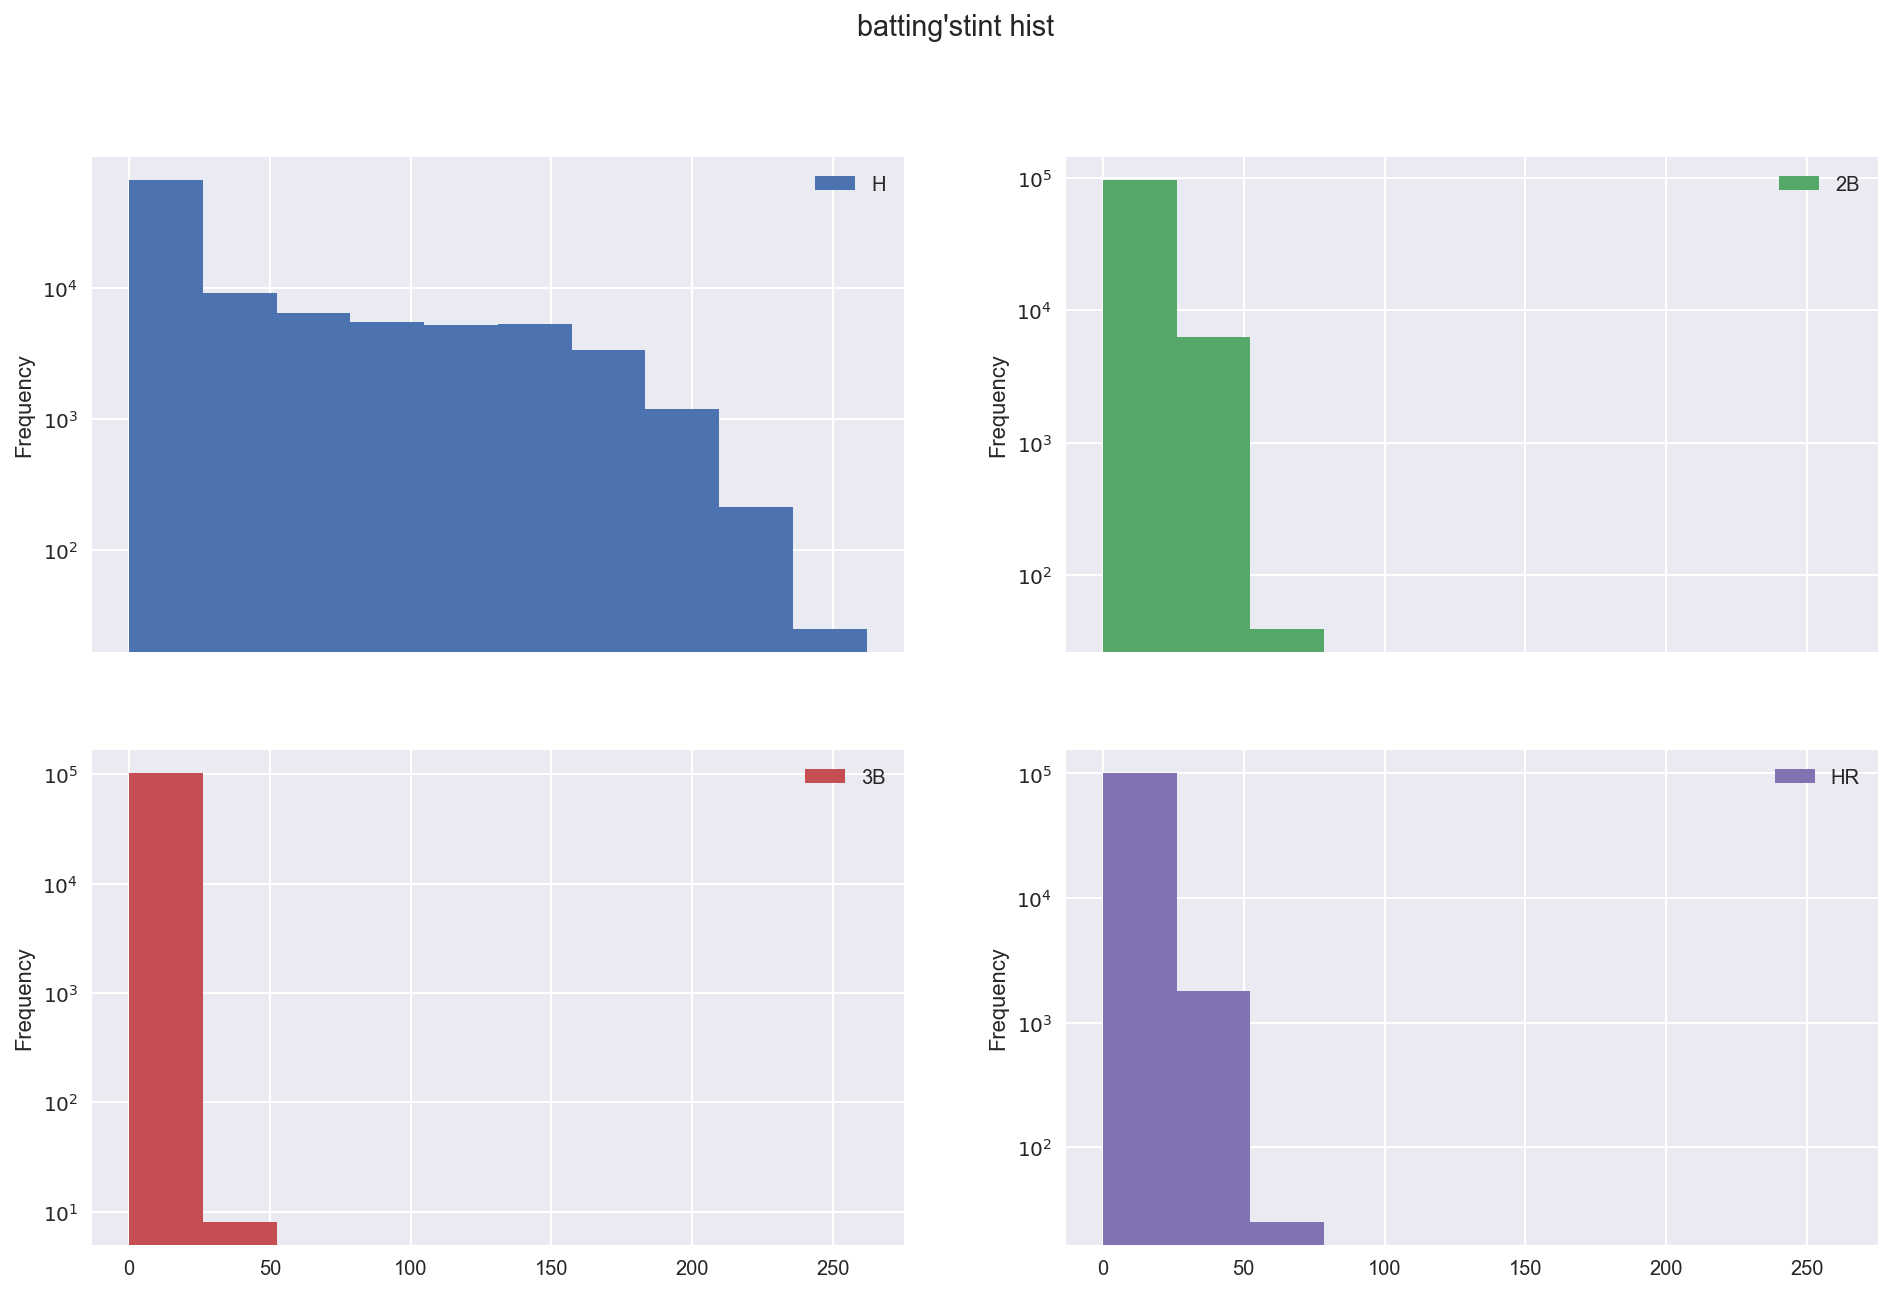

In [18]:
batting[["H","2B","3B","HR"]].plot.hist(subplots=True,bins=10,logy=True,title="batting'stint hist",figsize=(16,10),layout=(2,2))

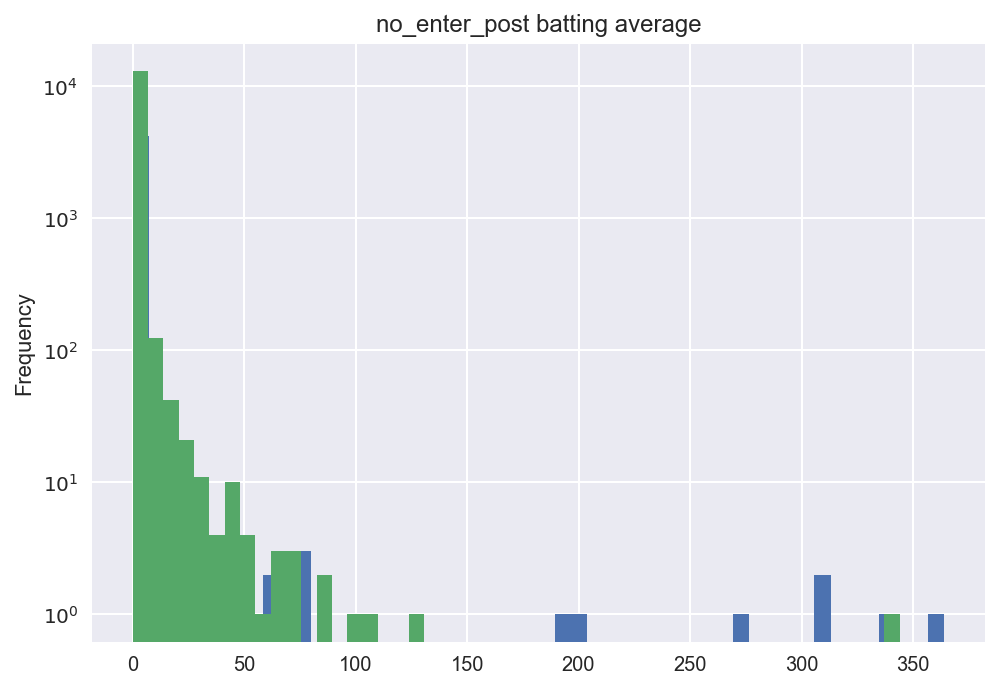

In [161]:
enter_post_batting_average.plot.hist(bins=50,logy=True,title="enter_post batting average")
no_enter_post_batting_average.plot.hist(bins=50,logy=True,title="no_enter_post batting average")

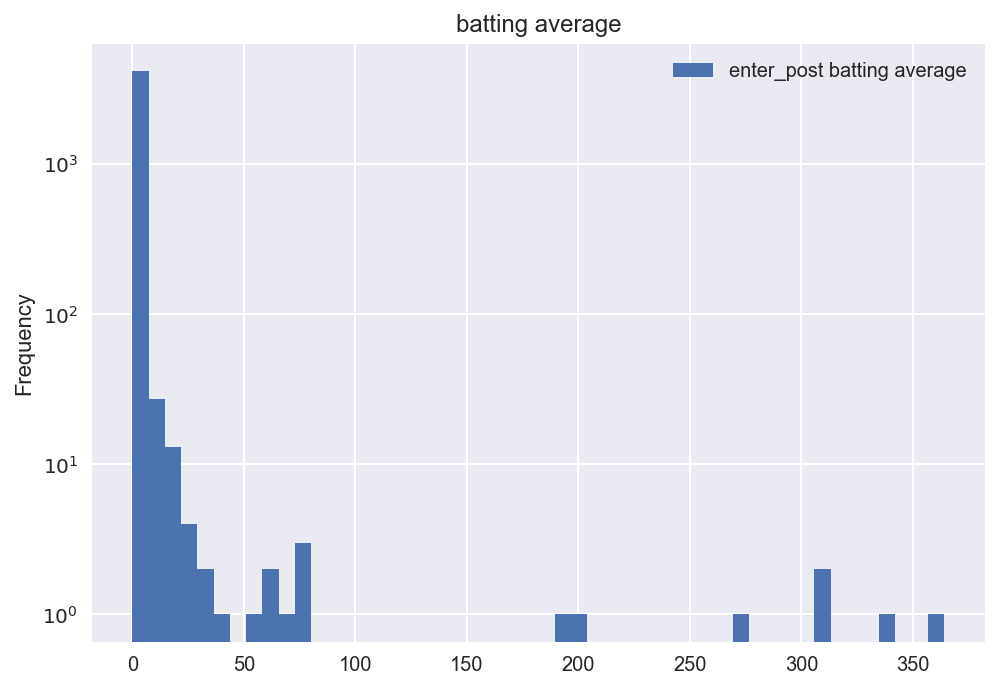

In [165]:
enter_post_batting_average.plot.hist(bins=50,logy=True,title="batting average",legend=True,label="enter_post batting average")

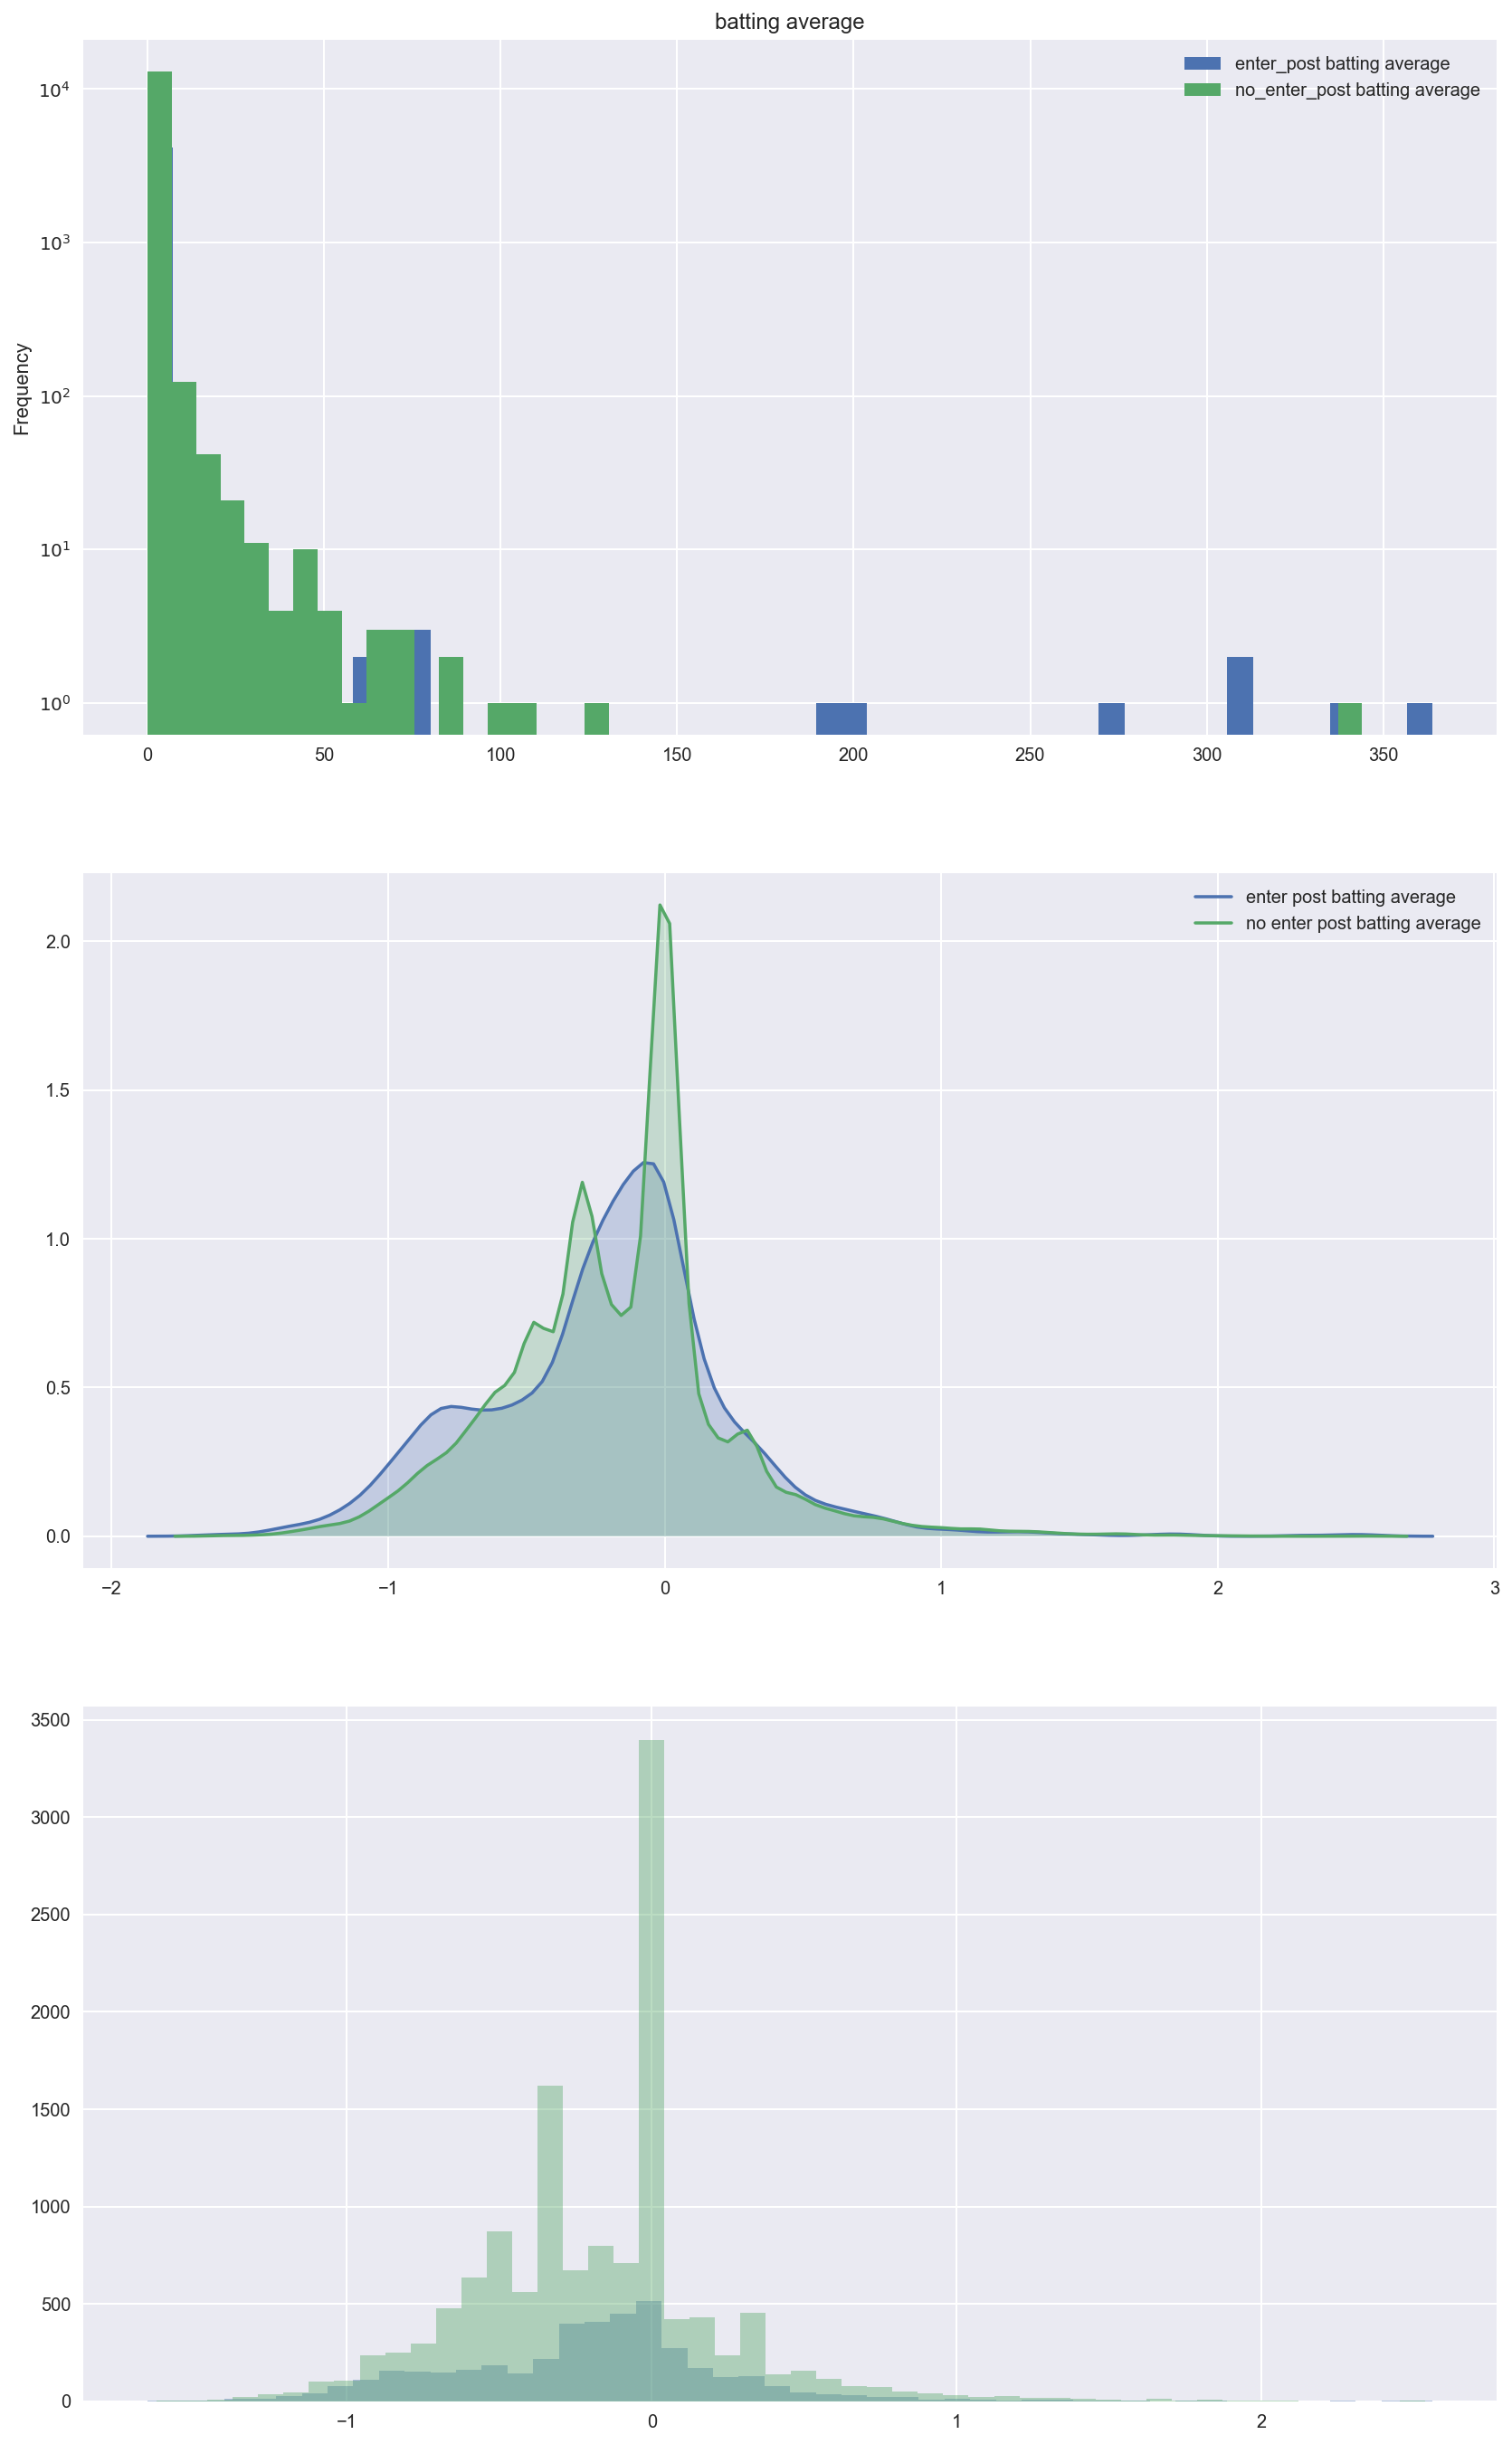

In [168]:
fig,axes_batting = plt.subplots(3,1,figsize=(14,24))
enter_post_batting_average = ((enter_post_batting.groupby("playerID")["R"].sum()+1)/(enter_post_batting.groupby("playerID")["SO"].sum()+1))
no_enter_post_batting_average = ((no_enter_post_batting.groupby("playerID")["R"].sum()+1)/(no_enter_post_batting.groupby("playerID")["SO"].sum()+1))

enter_post_batting_average.plot.hist(bins=50,logy=True,title="batting average",ax=axes_batting[0],legend=True,label="enter_post batting average")
no_enter_post_batting_average.plot.hist(bins=50,logy=True,ax=axes_batting[0],legend=True,label="no_enter_post batting average")
sns.kdeplot(np.log10(enter_post_batting_average).dropna(),shade=True,ax=axes_batting[1],label="enter post batting average")
sns.kdeplot(np.log10(no_enter_post_batting_average ).dropna(),shade=True,ax=axes_batting[1],label="no enter post batting average")
sns.distplot(np.log10(enter_post_batting_average).dropna(),kde=False,ax=axes_batting[2],label="enter post batting average")
sns.distplot(np.log10(no_enter_post_batting_average ).dropna(),kde=False,ax=axes_batting[2],label="no enter post batting average")
# sns.distplot(batting_average.dropna())


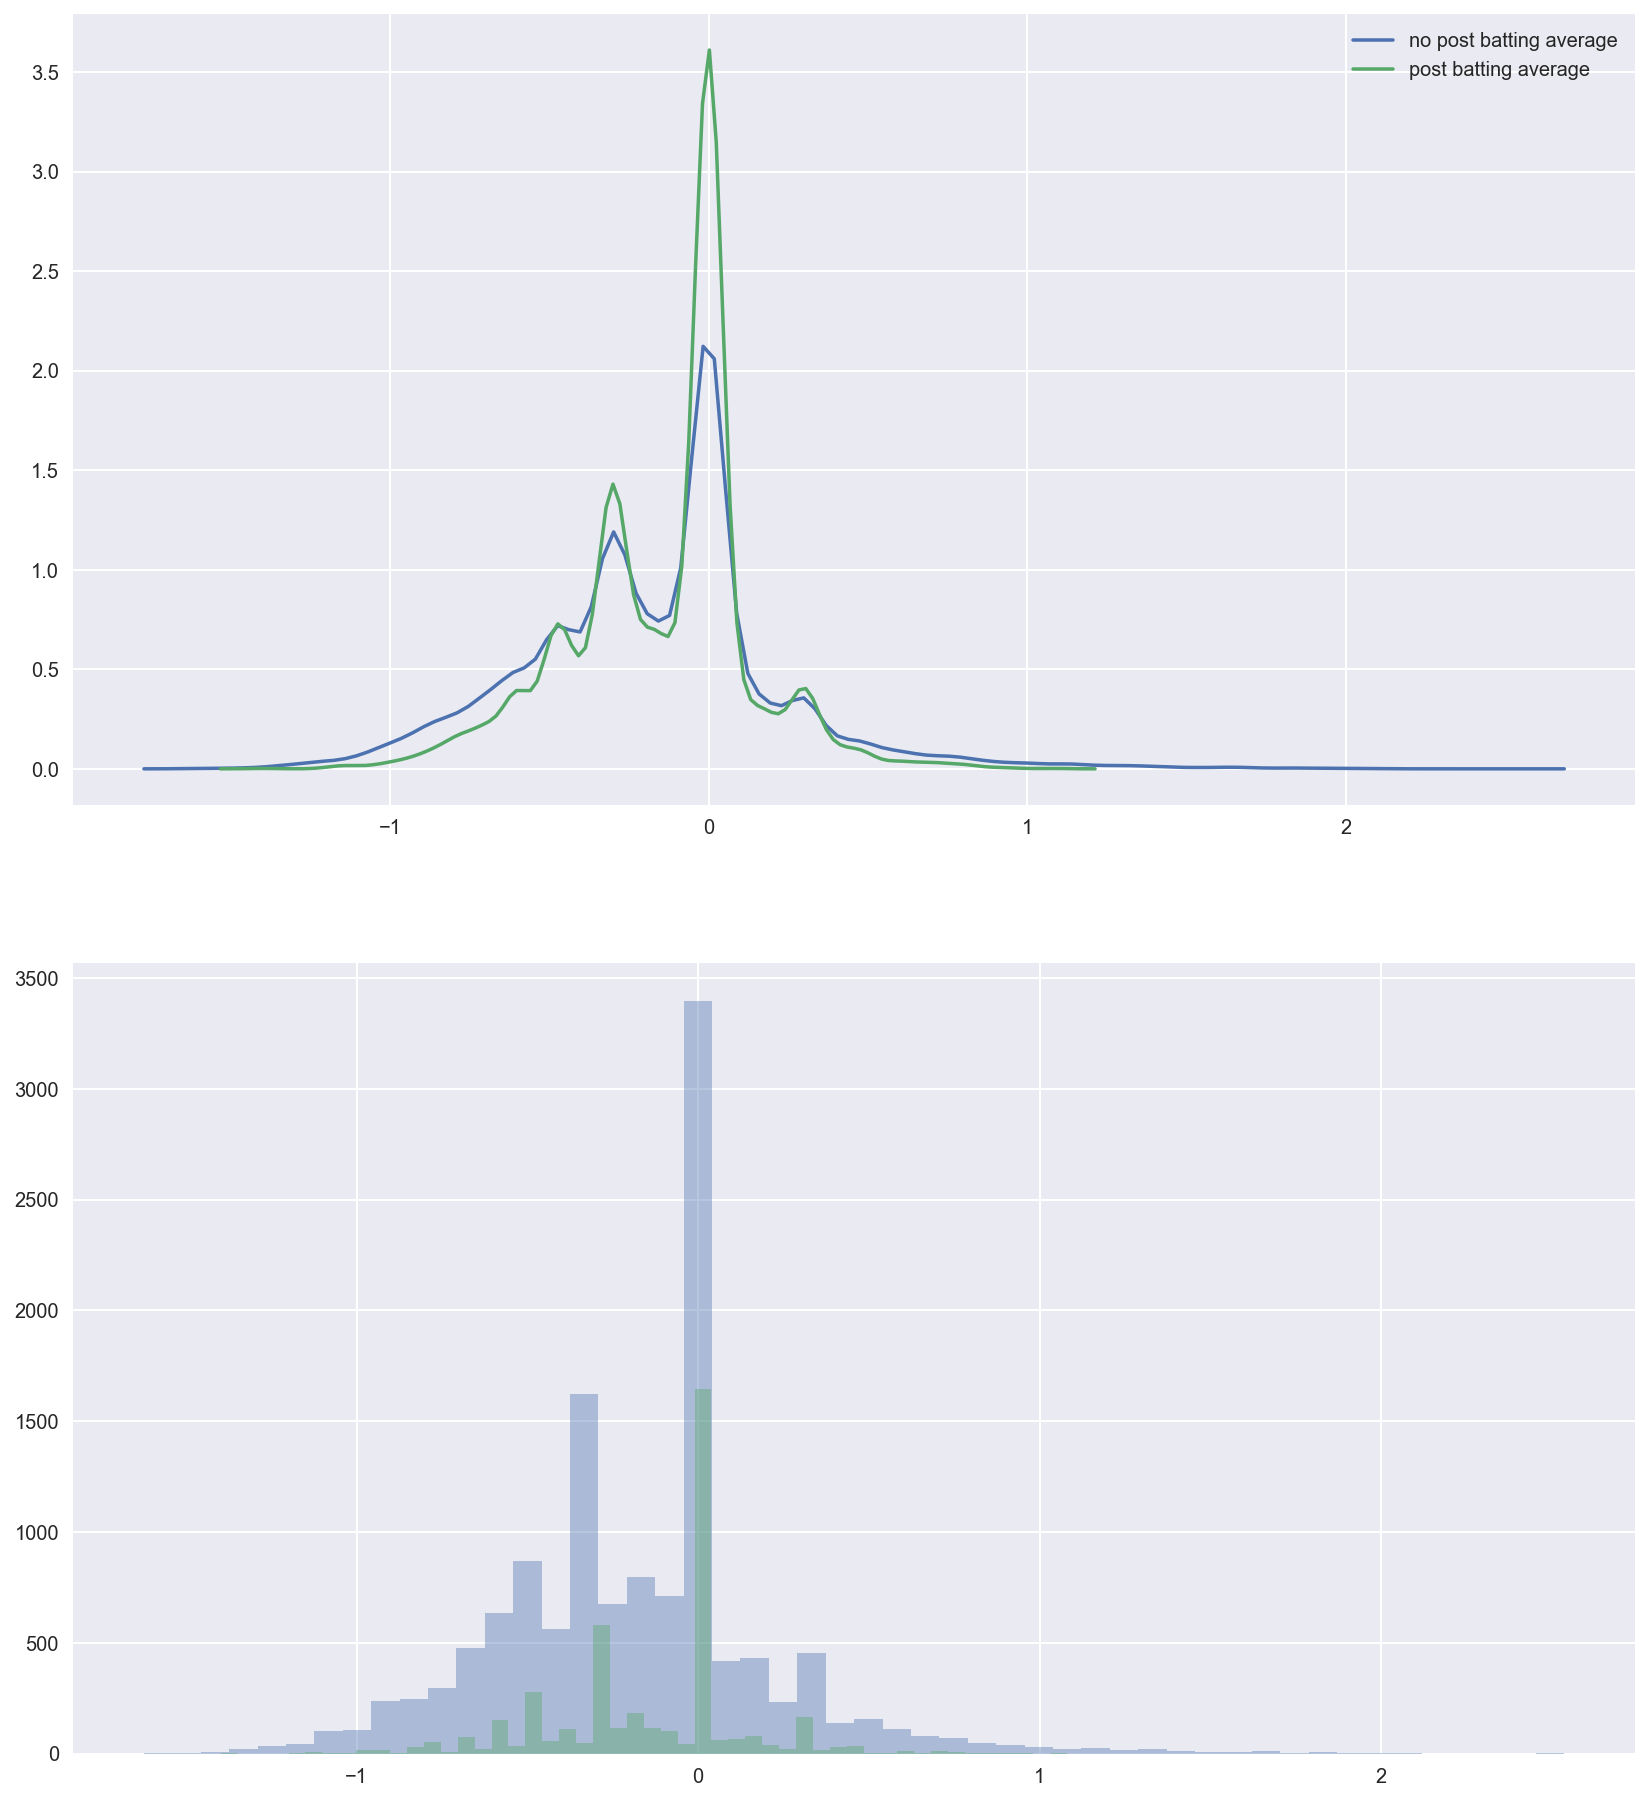

In [89]:
fig,axes_batting = plt.subplots(2,1,figsize=(14,16))
no_post_batting_average = ((no_post_batting.groupby("playerID")["R"].sum()+1)/(no_post_batting.groupby("playerID")["SO"].sum()+1))
post_batting_average = ((post_batting.groupby("playerID")["R"].sum()+1)/(post_batting.groupby("playerID")["SO"].sum()+1))
sns.distplot(np.log10(no_post_batting_average).dropna(),hist=False,ax=axes_batting[0],label="no post batting average")
sns.distplot(np.log10(post_batting_average).dropna(),hist=False,ax=axes_batting[0],label="post batting average")
sns.distplot(np.log10(no_post_batting_average).dropna(),kde=False,ax=axes_batting[1],label="no post batting average")
sns.distplot(np.log10(post_batting_average).dropna(),kde=False,ax=axes_batting[1],label="post batting average")

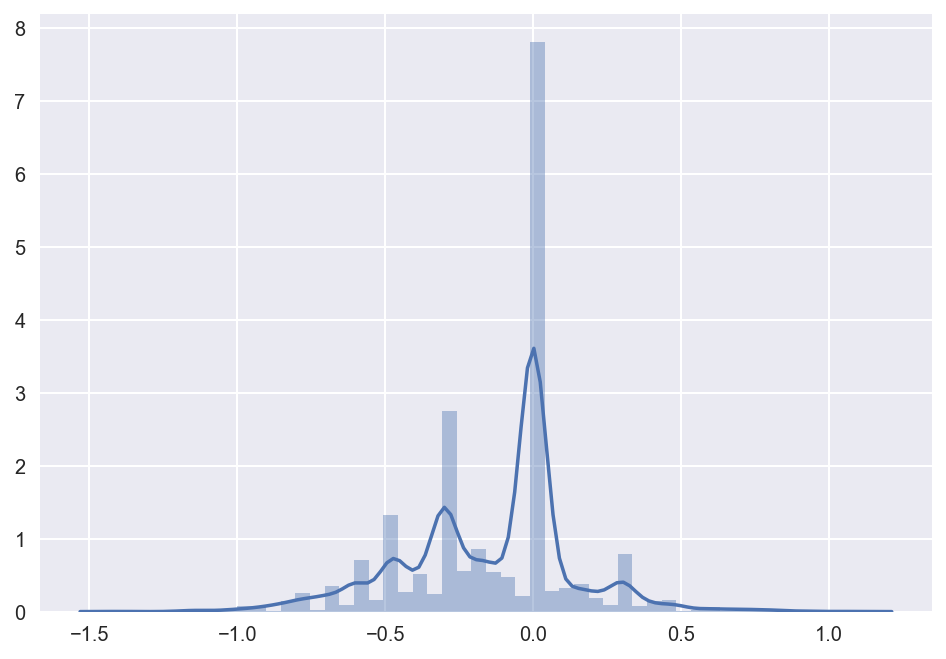